In [1]:
# Cell 1: Import libraries
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import os
print("Libraries imported successfully")

Libraries imported successfully


In [2]:
# Cell 2: Load ARFF file
arff_file = 'data/Training Dataset.arff'
try:
    data_arff, meta = arff.loadarff(arff_file)
    df = pd.DataFrame(data_arff)
    print("Dataset loaded successfully")
except Exception as e:
    print("Error loading ARFF:", e)
    raise

Dataset loaded successfully


In [3]:
# Cell 3: Decode byte strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')
print("Byte strings decoded")

Byte strings decoded


In [4]:
print(df['Result'].dtype)

object


In [5]:
# Cell 4: Inspect dataset
print("Raw data head:")
print(df.head())
print("\nRaw data shape:", df.shape)
print("Raw data columns:", df.columns.tolist())
print("\nLabel column (Result) unique values:")
print(df['Result'].value_counts())

Raw data head:
  having_IP_Address URL_Length Shortining_Service having_At_Symbol  \
0                -1          1                  1                1   
1                 1          1                  1                1   
2                 1          0                  1                1   
3                 1          0                  1                1   
4                 1          0                 -1                1   

  double_slash_redirecting Prefix_Suffix having_Sub_Domain SSLfinal_State  \
0                       -1            -1                -1             -1   
1                        1            -1                 0              1   
2                        1            -1                -1             -1   
3                        1            -1                -1             -1   
4                        1            -1                 1              1   

  Domain_registeration_length Favicon  ... popUpWidnow Iframe age_of_domain  \
0                     

In [6]:
# Cell 5: Check duplicates
print("Duplicate rows:", df.duplicated().sum())
print("Unique rows:", len(df) - df.duplicated().sum())

# Check duplicates in subset
features = [
    'having_IP_Address', 'URL_Length', 'having_At_Symbol',
    'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
    'HTTPS_token', 'Result'
]
df_subset = df[features]
print("\nSubset (7 features + Result) duplicate rows:", df_subset.duplicated().sum())
print("Subset unique rows:", len(df_subset) - df_subset.duplicated().sum())
print("\nSample duplicate rows (subset):")
print(df_subset[df_subset.duplicated(keep=False)].head(10))

Duplicate rows: 5206
Unique rows: 5849

Subset (7 features + Result) duplicate rows: 10806
Subset unique rows: 249

Sample duplicate rows (subset):
  having_IP_Address URL_Length having_At_Symbol double_slash_redirecting  \
0                -1          1                1                       -1   
1                 1          1                1                        1   
2                 1          0                1                        1   
3                 1          0                1                        1   
4                 1          0                1                        1   
5                -1          0                1                       -1   
6                 1          0                1                        1   
7                 1          0                1                        1   
8                 1          0                1                        1   
9                 1          1                1                        1   

  Prefix_Suffix

In [7]:
# Cell 7: Clean dataset
df = df.drop_duplicates()
print("Rows after removing duplicates:", len(df))

Rows after removing duplicates: 5849


In [8]:
# Cell 8: Select features and labels
features = [
    'having_IP_Address', 'URL_Length', 'having_At_Symbol',
    'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain',
    'HTTPS_token'
]
# Optional: Use all features
# features = [col for col in df.columns if col != 'Result']
X = df[features]
y = df['Result']
print("Features selected:", features)
print("X shape:", X.shape)
print("y shape:", y.shape)

Features selected: ['having_IP_Address', 'URL_Length', 'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix', 'having_Sub_Domain', 'HTTPS_token']
X shape: (5849, 7)
y shape: (5849,)


In [9]:
# Cell 9: Convert data types
try:
    X = X.astype(float).astype(int)
    y = y.map({'-1': 0, '1': 1, -1: 0, 1: 1, -1.0: 0, 1.0: 1})
    print("Data types converted")
    print("X dtypes:", X.dtypes)
    print("y dtype:", y.dtype)
except ValueError as e:
    print("Conversion error:", e)
    for col in X.columns:
        print(f"{col} unique values:", X[col].unique())
    raise

Data types converted
X dtypes: having_IP_Address           int64
URL_Length                  int64
having_At_Symbol            int64
double_slash_redirecting    int64
Prefix_Suffix               int64
having_Sub_Domain           int64
HTTPS_token                 int64
dtype: object
y dtype: int64


In [10]:
# Cell 10: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4679, 7)
X_test shape: (1170, 7)
y_train shape: (4679,)
y_test shape: (1170,)


In [11]:
# Cell 11: Train model
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
print("Model trained successfully")

Model trained successfully


Accuracy: 0.7307692307692307

Classification Report:
              precision    recall  f1-score   support

    Phishing       0.73      0.79      0.76       620
  Legitimate       0.74      0.67      0.70       550

    accuracy                           0.73      1170
   macro avg       0.73      0.73      0.73      1170
weighted avg       0.73      0.73      0.73      1170



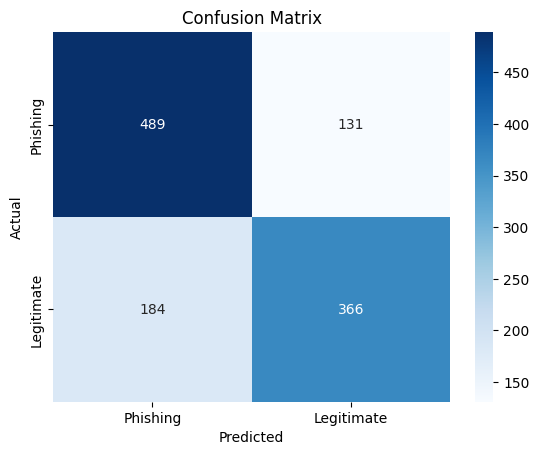

Confusion matrix saved to figures/confusion_matrix.png


In [12]:
# Cell 12: Evaluate model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Phishing', 'Legitimate']))

# Plot confusion matrix
os.makedirs('figures', exist_ok=True)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Phishing', 'Legitimate'], yticklabels=['Phishing', 'Legitimate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('figures/confusion_matrix.png')
plt.show()
print("Confusion matrix saved to figures/confusion_matrix.png")

In [13]:
# Cell 13: Save model
os.makedirs('models', exist_ok=True)
joblib.dump(model, 'models/logistic_regression_model.pkl')
print("Model saved to models/logistic_regression_model.pkl")

Model saved to models/logistic_regression_model.pkl
